# **Project: Netflix Movies and T.V Shows Clustering**

# Business Context -
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project,we are required to do


*   Exploratory Data Analysis
*   Understanding what type content is available in different countries
*   If Netflix has been increasingly focusing on TV rather than movies in recent years
*   Clustering similar content by matching text_based features




# Dataset Description -


---
Fields---Description

1. Show_id--- Unique ID for every Movie/Tv Show
2. type--- Identifier-A Movie or TV show
3. title--- Title of the movie/show
4. director---Director of the show
5. cast--- Actors involved
6. Country--- Country of production
7. date-added--- Date it was added on Netflix
8. release_year--- Actual release year of the show
9. rating--- TV rating of the show
10. duration--- Total duration in minutes or number of seasons
11. listed_in--- Genre
12. Description--- The summary description


---



In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Import the dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


# **Overview Of Dataset**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [ ]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [ ]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added']


0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7777, dtype: datetime64[ns]

In [ ]:
# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

In [ ]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()


0


In [ ]:
df['title'] = df['title'].str.strip()
df['title'] = df['title'].str.lower()
df['listed_in'] = df['listed_in'].str.strip()
df['listed_in'] = df['listed_in'].str.lower()


In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

# **EDA**

1. Movies and TV Shows in the dataset

In [ ]:
import plotly.express as px
# Create a new DataFrame with the counts
df_type_counts = df['type'].value_counts().reset_index()
print(df_type_counts)
# Rename the columns for clarity
df_type_counts.columns = ['Type', 'Count']
# Create a pie chart using Plotly
fig = px.pie(df_type_counts, names='Type', values='Count',
             title='Movies and TV Shows in the dataset')
# Update layout to remove the y-axis label
fig.update_layout(yaxis_title='')
# Show the Plotly figure
fig.show()


     index  type
0    Movie  5377
1  TV Show  2400


*From above pie plot we see that there are more movies(69.14%) than TV shows(30.86%)*

2. Top 10 directors by number of shows directed

In [ ]:
# Filter out rows where 'director' is not 'Unknown', count values, and get the top 10 directors
top_directors = df[~(df['director'] == 'Unknown')]['director'].value_counts().nlargest(10)
# Create a bar chart using Plotly
fig = px.bar(top_directors, x=top_directors.index, y=top_directors.values,
             title='Top 10 directors by number of shows directed')
# Show the Plotly figure
fig.show()


**From above bar plot we say that Raul Campus,jan Suter are the top 1 director.**


3. Top 10 countries with the highest number of shows

In [ ]:
# Filter out rows where 'country' is not 'Unknown', count values, and get the top 10 countries
top_countries = df[~(df['country'] == 'Unknown')]['country'].value_counts().nlargest(10)

# Create a bar chart using Plotly
fig = px.bar(x=top_countries.index, y=top_countries.values)
fig.update_layout(
    title='Top 10 countries with the highest number of shows',
    xaxis_title='Country',
    yaxis_title='Number of Shows'
)

# Show the Plotly figure
fig.show()


United States are the top one country of highest number shows in the dataset followed by the India

4. Distribution by Released Year

In [ ]:
fig = px.histogram(df, x='release_year', title='Distribution by Released Year')
fig.show()


In the year 2018 most number of the shows released followed by the year 2017 and from 2020 we see sudden downfall its due to covid

5. Length distribution of movies

In [ ]:
df['duration'] = df['duration'].apply(lambda x:int(x.split()[0]))

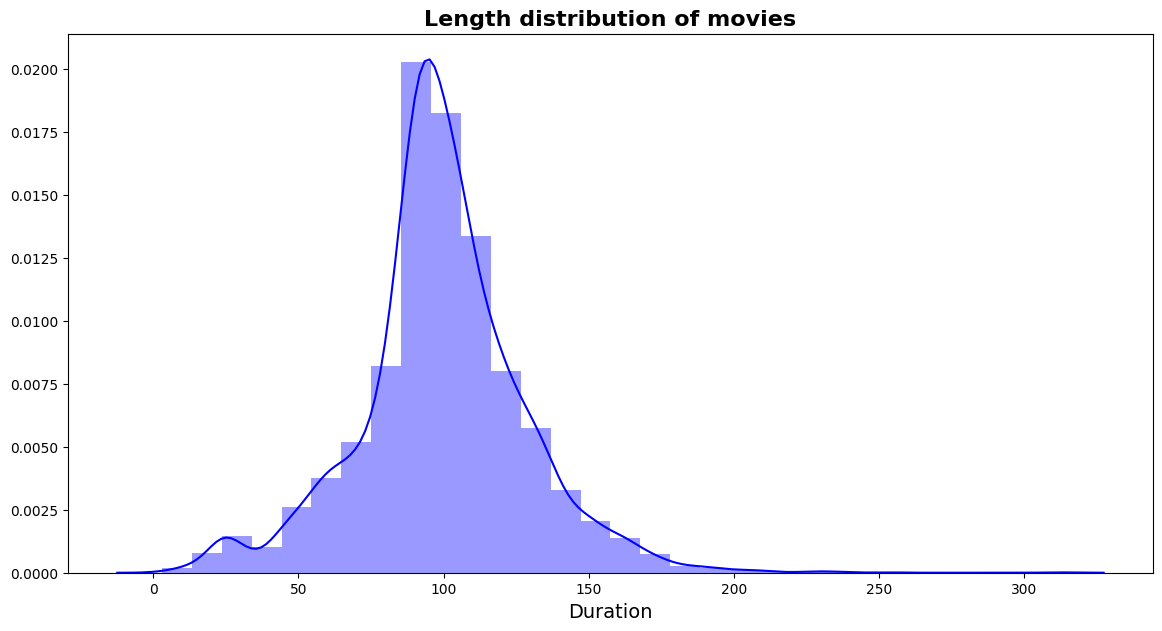

In [ ]:
# Length distribution of movies
movie_df = df[df['type']=='Movie']
plt.figure(figsize=(14, 7))
sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)
plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

6. Age ratings for shows in the dataset

<Axes: xlabel='rating', ylabel='count'>

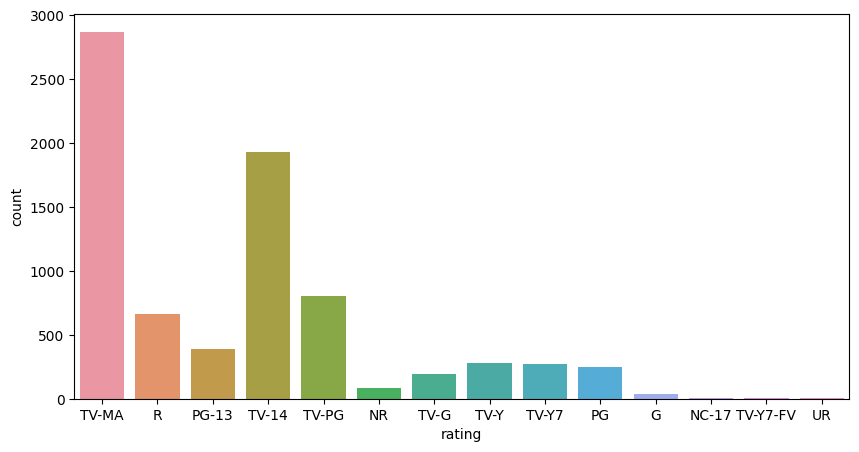

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

In this plot we found all rating count. TV-MA is the highest rating and second highest is TV-14 and third highest is TV-PG rating.

7. Top 10 Genres

Text(0.5, 1.0, 'top 10 Genres')

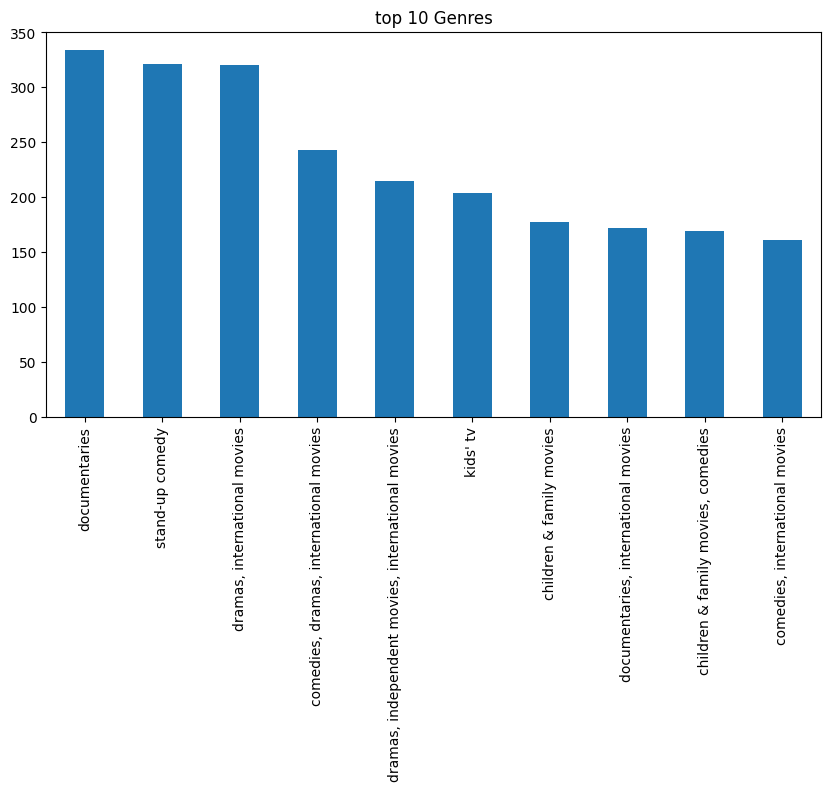

In [ ]:
#Top 10 genres
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('top 10 Genres')

In this  bar plot we found documentaries have high value_counts of shows and movies.

8. shows added by the month

In [ ]:
df['month_added']

0        8
1       12
2       12
3       11
4        1
        ..
7782    10
7783     3
7784     9
7785    10
7786     3
Name: month_added, Length: 7777, dtype: int64

In [ ]:
month_counts = df['month_added'].value_counts().reset_index()
month_counts.columns = ['Month', 'Count']

# Create a bar plot using Plotly Express
fig = px.bar(month_counts, x='Month', y='Count')

# Show the plot
fig.show()

December is the highest number of shows added on and October is second highest number of shows addedd on. We see all month minority difference between them

9. Number of movies and TV shows added over the years

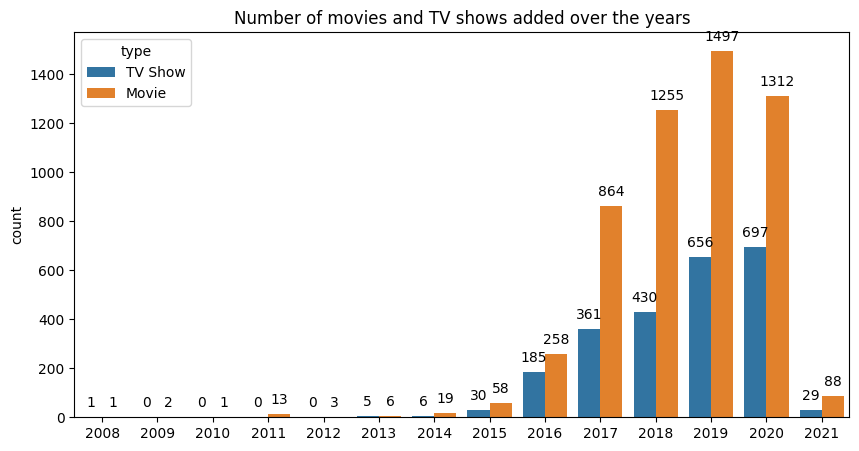

In [ ]:
#Number of movies and TV shows over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df,hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(),'.0f'), (i.get_x()+ i.get_width()/2.,i.get_height()),ha = 'center',va = 'center', xytext= (0,10),textcoords='offset points')

In above graph we found that Number of movies and TV shows added over the years. In 2019 there are 1497 movies and 656 TV shows which is highest among all the years.

10. Number of shows released each year since 2008 that are on Netflix

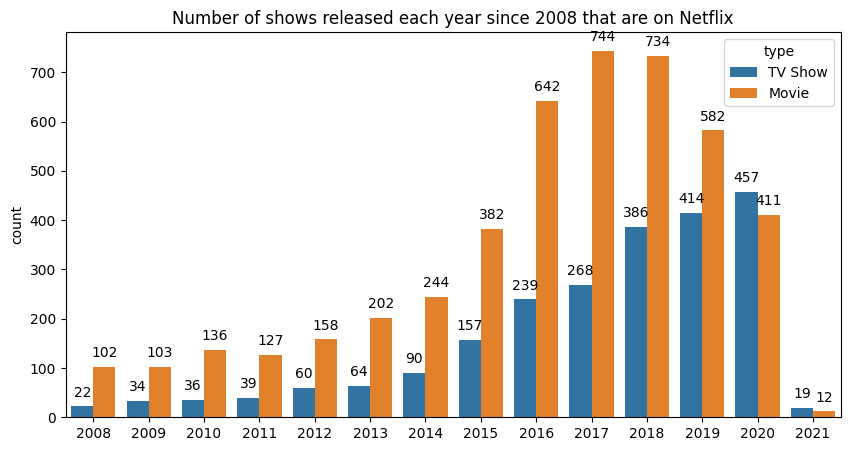

In [ ]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


 In this graph we found that Number of shows released each year since 2008 that are on Netflix.see this graph Before 2019 Movies are highest number of released but 2020 and 2021 TV shows are the highest number of released.

11. Number of seasons per TV show distribution

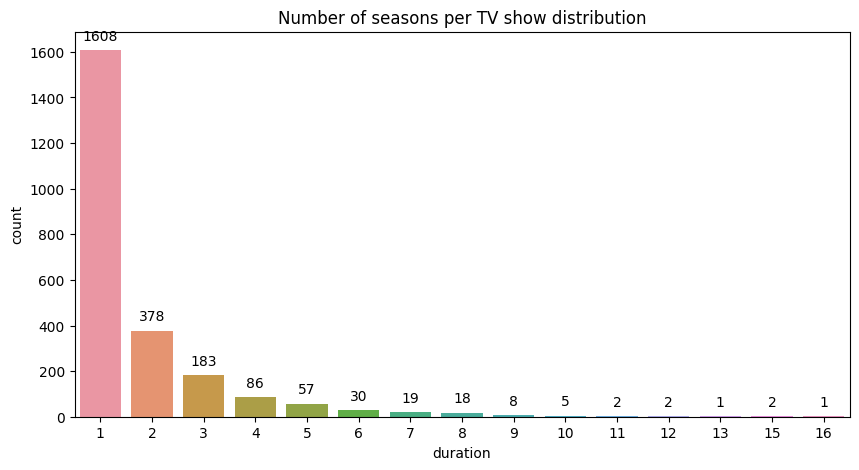

In [ ]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In this graph we found Number of per Seasons in each TV show count.first seasons are 1608 and second seasons are 378 and third seasons are 183 number of counting are there.

12. Top 10 genres for movies

In [ ]:
df[df['type']=='Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

Text(0.5, 1.0, 'Top 10 genres for movies')

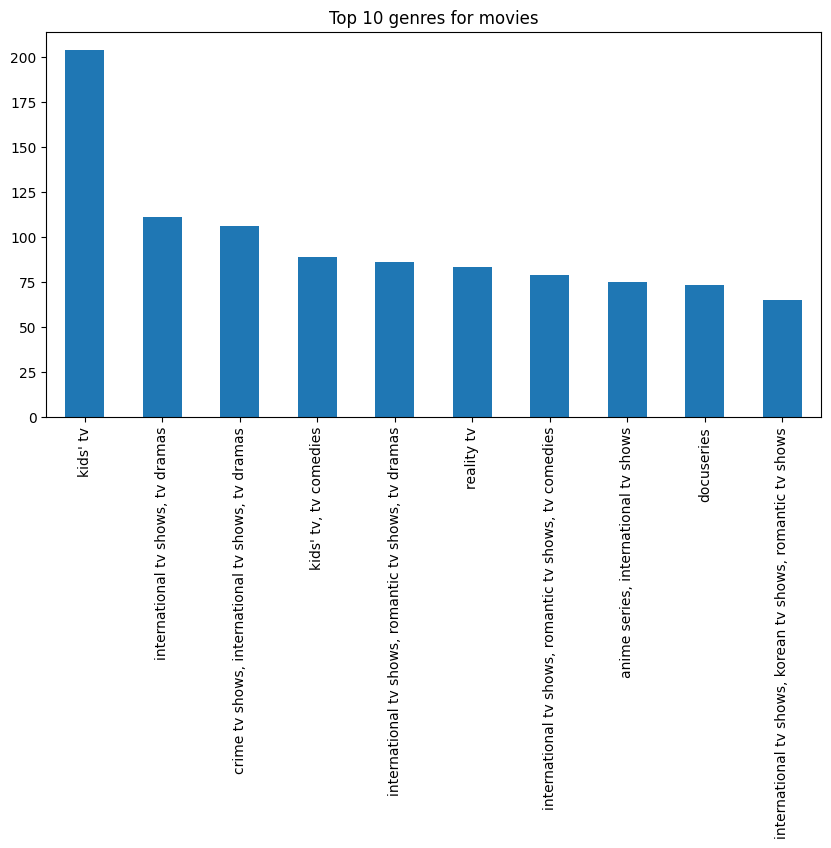

In [ ]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres for movies')

In this graph we found Top 10 genres for movies. International TV Shows are the highest number of genres type of TV shows and Crime TVShows and Kid's Shows are approximately same for generes type of TV shows.

13. Actors who have appeared in highest number of movies

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

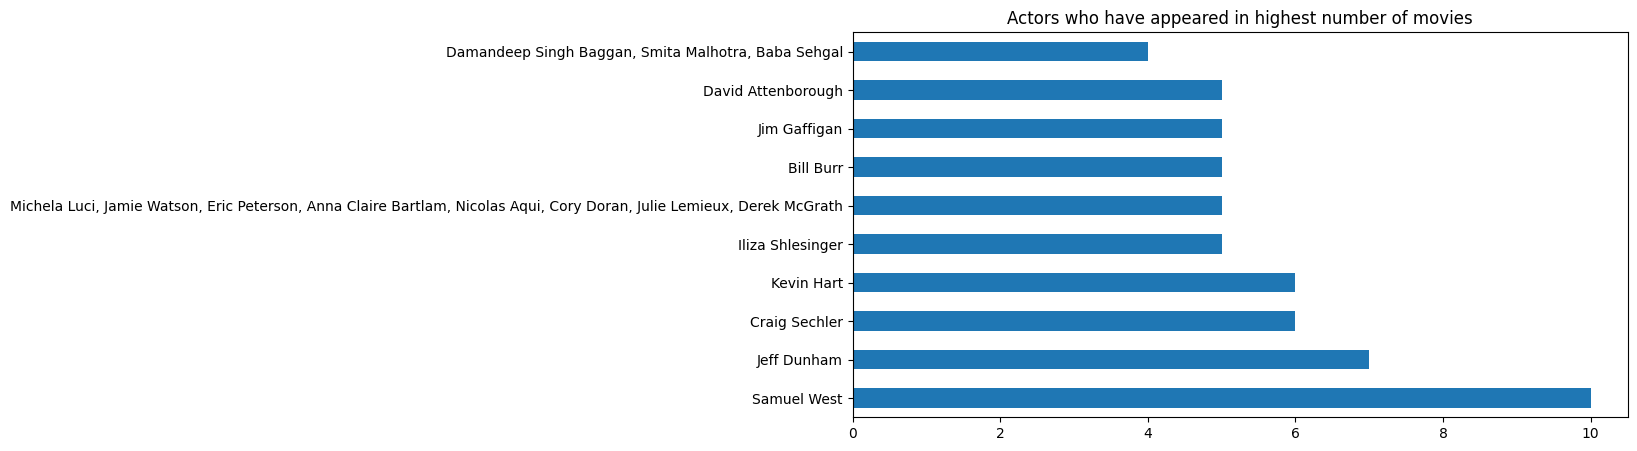

In [ ]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

In this graph we found Top actors for movies. Top one actor in movies are Samuel West and second highest actor are jeff Dunham and third highest actor of movies are Craig Sechler and Kevin Hart.

14. Actors who have appeared in highest number of TV shows

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

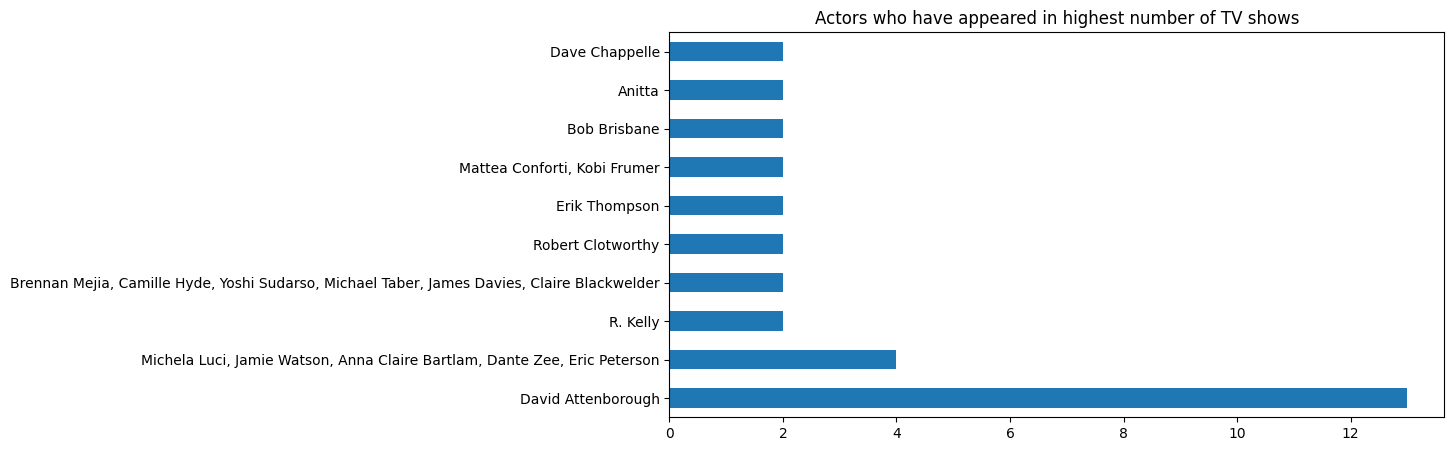

In [ ]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

 In this graph we found Actors who have appeared highest number of TV shows. Top one actor of TV Shows is David Attenborough and second highest actor in TV shows many are there like Michela Luci,Jamie Watson,Anna Claire Bartlam,Dante Zee and Eric peterson.

# Building a wordcloud for the movie descriptions

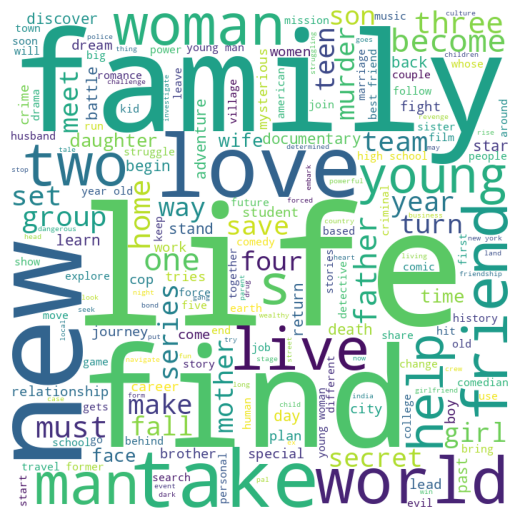

In [ ]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# **Data Processing**

In [ ]:
# Using the original dataset for clustering since
# it does not require handling missing values
Dataset = df.copy()

In [ ]:
Dataset.fillna('',inplace=True)

In [ ]:
# Combining all the clustering attributes into a single column

Dataset['clustering'] = (Dataset['director'] + ' ' +
                                Dataset['cast'] +' ' +
                                Dataset['country'] +' ' +
                                Dataset['listed_in'] +' ' +
                                Dataset['description'])

In [ ]:
# Select the 100 number of clusters for the dataset
Dataset['clustering'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India comedies, dramas, international movies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

## **Removing Punctuation**

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
Dataset['clustering'] = Dataset['clustering'].apply(remove_punctuation)

In [ ]:
# Select the 100 number of clusters for the dataset
Dataset['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India comedies dramas international movies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing non-ASCII characters:**

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
Dataset['clustering'] = remove_non_ascii(Dataset['clustering'])

In [ ]:
# Select the 100 number of clusters for the dataset
Dataset['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India comedies dramas international movies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing stopwords**

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sentences = stopwords.words('english')
# displaying the stopwords
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sentences]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
Dataset['clustering'] = Dataset['clustering'].apply(remove_stopwords)

In [ ]:
# Select the 100 number of clusters for the dataset
Dataset['clustering'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies dramas international movies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

# **Removing  Lemmatization:**

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization
Dataset['clustering'] = lemmatize_verbs(Dataset['clustering'])

In [ ]:
# Select the 100 number of clusters for the dataset
print(Dataset['clustering'][100])

rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies dramas international movies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system


# **Tokenization:**

In [ ]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()

In [ ]:
# Create text column based on dataset
Dataset['clustering'] = Dataset['clustering'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
# Select the 100 number of Tokenization for the dataset
print(Dataset['clustering'][100])

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'dramas', 'international', 'movies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


# **Vectorization:**

In [ ]:
# clustering tokens saved in a variable
clustering_vectorization = Dataset['clustering']

In [ ]:
# Tokenization
def tokenizer(text):
  return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)
x = tfidf.fit_transform(clustering_vectorization)

In [ ]:
# Dataset Rows & Columns count
x.shape

(7777, 20000)

In [ ]:
# convert X into array form for clustering
X = x.toarray()

In [ ]:
# Check the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#**Reduceing Diemensionality using PCA**

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)

PCA(random_state=40)

Text(0, 0.5, 'cumulative explained variance')

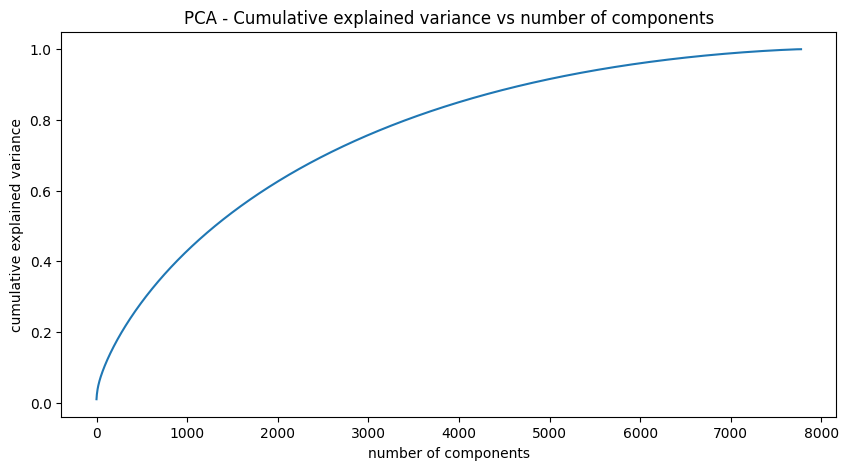

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=40)
pca.fit(X)

PCA(n_components=4000, random_state=40)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(7777, 4000)

# **Unservised Machine Learning clustering algorithms**
##**1.K-Means Clustering:**

Text(0, 0.5, 'WCSS')

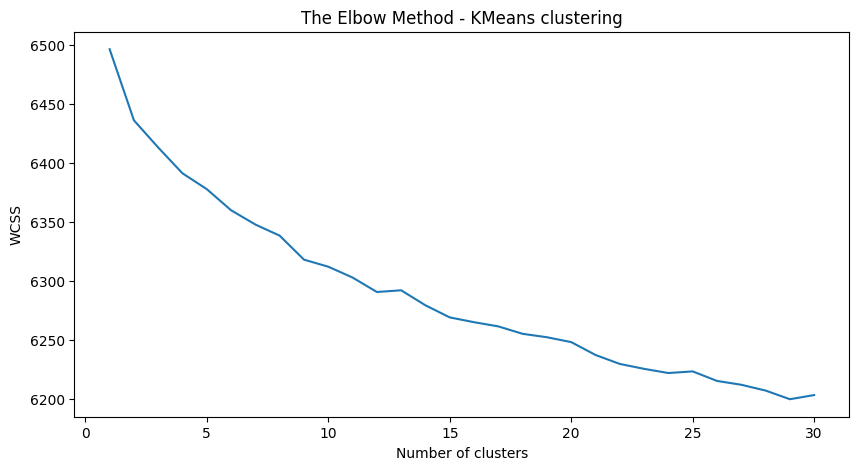

In [ ]:
# Elbow method to find the optimal value of k
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

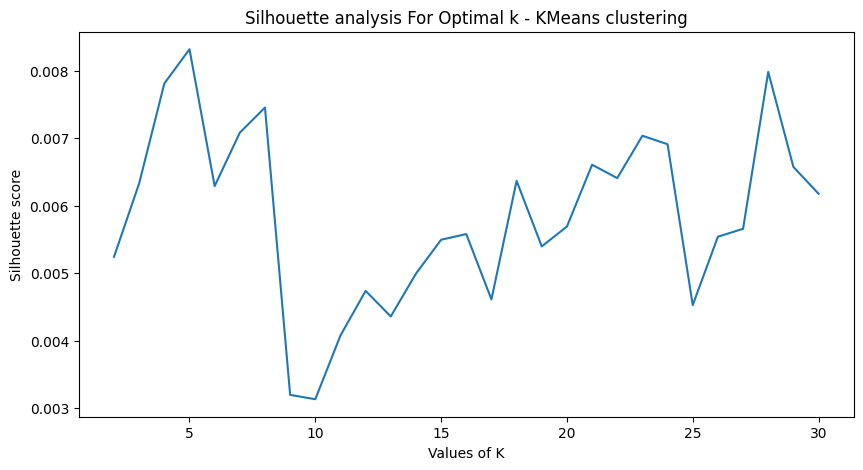

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=40)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=40)

In [ ]:
# Adding a kmeans cluster number attribute
Dataset['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6364.575567031852, -0.00010833101912879951)


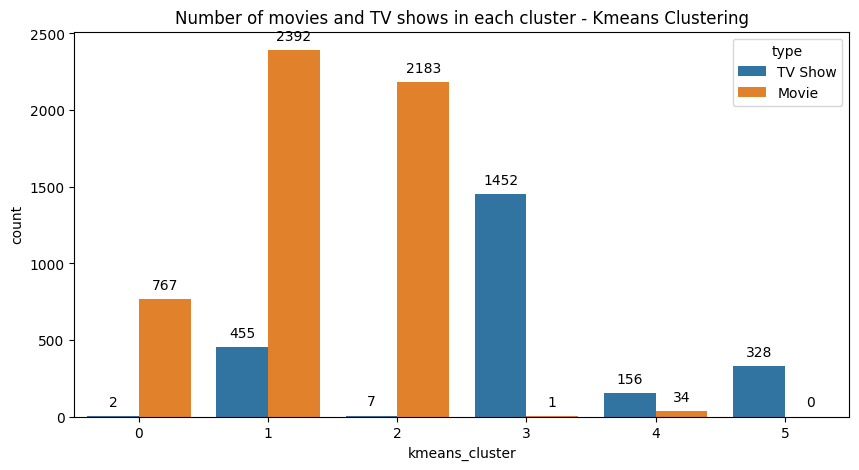

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=Dataset, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in Dataset[Dataset['kmeans_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)



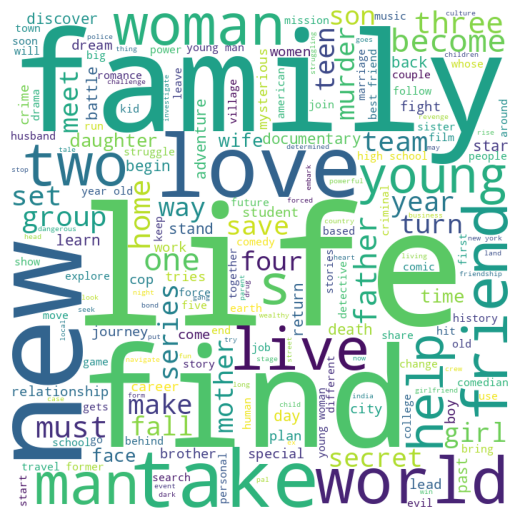

In [ ]:
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##**2.Hierarchical clustering:**

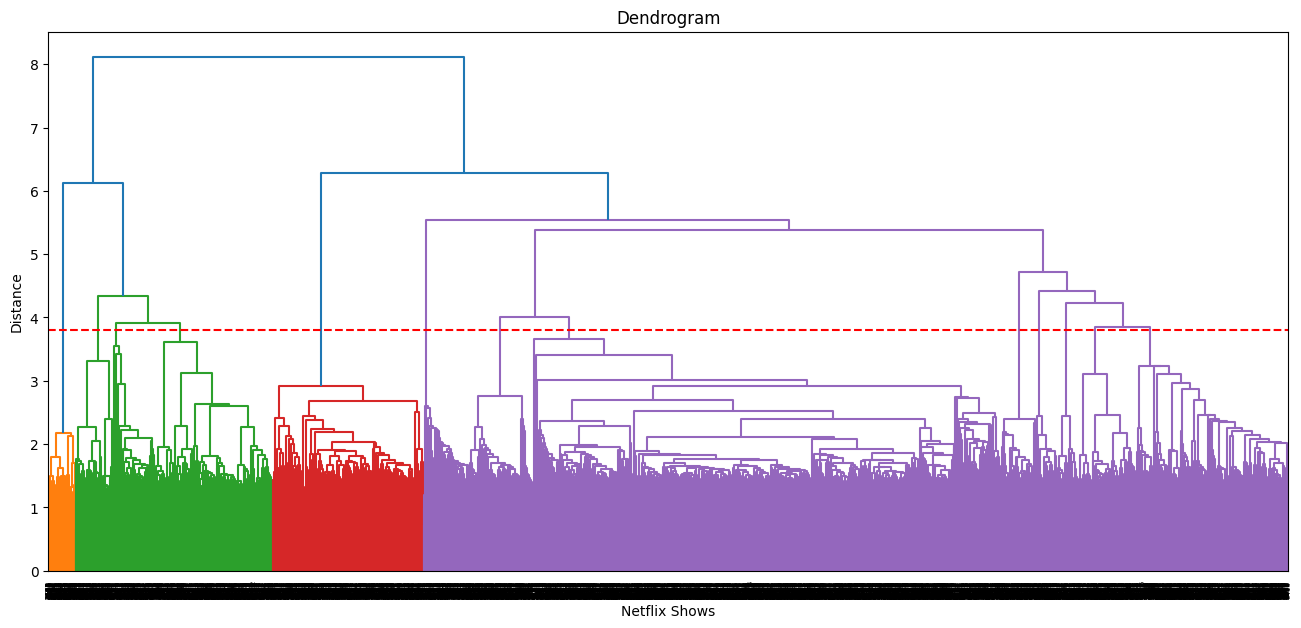

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(16, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

array([0, 0, 2, ..., 4, 2, 4])

In [ ]:
# Adding a kmeans cluster number attribute
Dataset['hierarchical_cluster'] = hierarchical.labels_

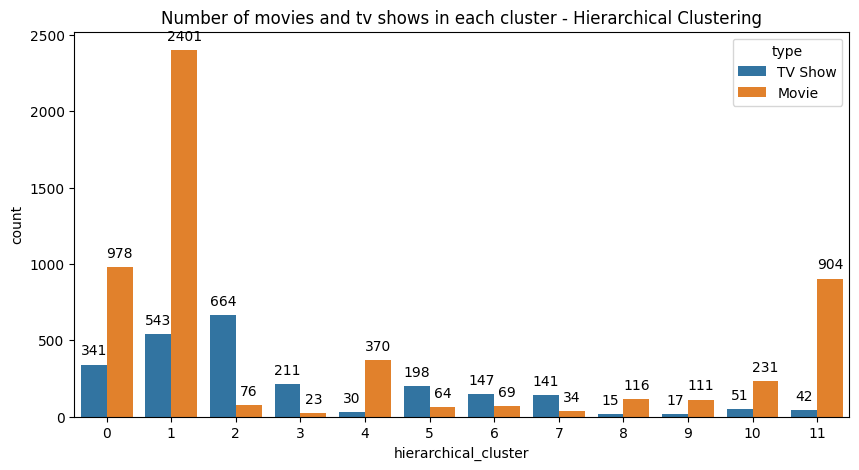

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=Dataset, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in Dataset[Dataset['hierarchical_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  return hierarchical_worldcloud

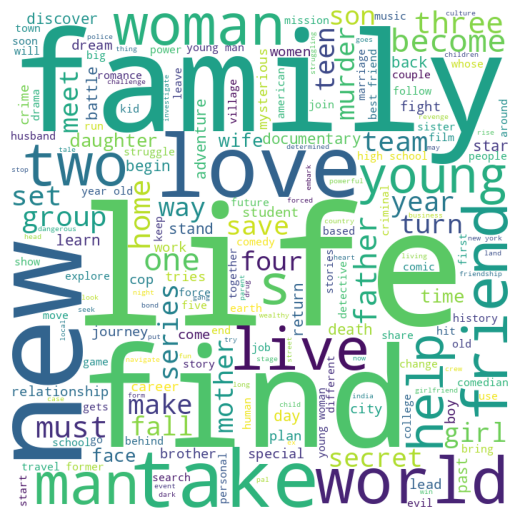

In [ ]:
# plot the WordCloud image
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# **Using Content based recommender system**

In [ ]:
Dataset.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,clustering,kmeans_cluster,hierarchical_cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,"international tv shows, tv dramas, tv sci-fi &...",In a future where the elite inhabit an island ...,8,2020,"[unknown, joao, miguel, bianca, comparato, mic...",3,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,"dramas, international movies",After a devastating earthquake hits Mexico Cit...,12,2016,"[jorge, michel, grau, demian, bichir, hector, ...",2,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,"horror movies, international movies","When an army recruit is found dead, his fellow...",12,2018,"[gilbert, chan, tedd, chan, stella, chung, hen...",2,2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,"action & adventure, independent movies, sci-fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017,"[shane, acker, elijah, wood, john, c, reilly, ...",1,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,dramas,A brilliant group of students become card-coun...,1,2020,"[robert, luketic, jim, sturgess, kevin, spacey...",1,1


In [ ]:
# Changing the index of the df from show id to show title
Dataset['show_id'] = Dataset.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

Dataset['clustering'] = Dataset['clustering'].apply(lambda x: convert(x))

In [ ]:
# setting title of movies/Tv shows as index
Dataset.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(Dataset['clustering'])

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
# Dataset Rows & Columns count
cosine_similarity.shape

(7777, 7777)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(Dataset.index)

def Dataset_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(Dataset.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [86]:
indices = pd.Series(Dataset.index)
indices

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7772                                       zozo
7773                                     zubaan
7774                          zulu man in japan
7775                      zumbo's just desserts
7776    zz top: that little ol' band from texas
Name: title, Length: 7777, dtype: object

In [87]:
# Recommendations for 'zozo'
Dataset_10('zozo')

If you liked 'zozo', you may also enjoy:



['last breath',
 'in the deep',
 'the salvation',
 'the look of silence',
 'the boy in the striped pajamas',
 'the breadwinner',
 "summer of '92",
 'the danish girl',
 'nymphomaniac: volume ii',
 'battle']

In [88]:
# Recommendations for 'zz top: that little ol' band from texas'
Dataset_10("zz top: that little ol' band from texas")

If you liked 'zz top: that little ol' band from texas', you may also enjoy:



['mission control: the unsung heroes of apollo',
 'once in a lifetime sessions with onerepublic',
 'the show must go on: the queen + adam lambert story',
 'frozen planet: the epic journey',
 'remastered: devil at the crossroads',
 'catching the sun',
 'when two worlds collide',
 'tokyo idols',
 'trophy',
 'star men']



---



#**Conclusion**

1. In this project, our main objective was to perform text clustering on Netflix shows, organizing them into distinct clusters where shows within the same cluster share similarities, while those in different clusters exhibit dissimilarities.

2. We initially worked with a dataset comprising 7,787 records and 12 attributes. Our initial tasks involved handling missing data and conducting exploratory data analysis (EDA).

3. Our EDA revealed several key findings, such as Netflix having a larger collection of movies compared to TV shows, a consistent exponential growth in the total number of shows, a majority of shows originating from the United States, and a strong focus on content for adults and young adults.

4. Armed with insights from EDA, we proceeded to preprocess the text data, which involved removing punctuation and stop words. This refined data was then subjected to TF-IDF vectorization, a crucial step in our text-based clustering process.

5. We chose to cluster the data based on specific attributes: director, cast, country, genre, and description. These attribute values were tokenized, preprocessed, and subsequently transformed into TF-IDF vectors.

6. Through TF-IDF Vectorization, we generated a total of 20,000 attributes. To mitigate the challenges posed by high dimensionality, Principal Component Analysis (PCA) was employed. This process reduced the number of components to 4,000, capturing more than 80% of the variance. Subsequently, we employed the k-means clustering algorithm, determining the optimal number of clusters as 6 through the elbow method and Silhouette score analysis.

7. Agglomerative clustering was also applied, and the optimal number of clusters was identified as 12, using dendrogram visualization.

8. Finally, we developed a content-based recommender system based on the cosine similarity matrix. This system provides users with 10 personalized show recommendations based on their viewing history.

# Future Work :
 Deployment will be our next work


---



# **Thank You**